In [1]:
# en python:
import os
os.environ["https_proxy"] = "http://proxy.fr.cfm.fr:6060"
import numpy as np
import pandas as pd
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt

/home/yzhong/conda/envs/yihan_gpu/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [116]:
df=pd.read_excel('/mnt/research-live/user/yzhong/compare.xlsx',engine='openpyxl')

In [117]:
df = df.dropna(subset=['correct match']).loc[df['Only_chinese_version'] != 1.0]

In [118]:
df['correct match'] = df['correct match'].str.replace('*', '')

In [119]:
df.columns

Index(['Chinese titles', 'reference_translation', 'correct match',
       'Translation/ Model: Helskin', 'Translation/ Model: Small100',
       'Only_chinese_version', 'match delay', 'Laser_headline_ wt',
       'Laser_cos_wt', 'Translation_headline_wt', 'Translation_cos_wt',
       'Laser_headline_ wot', 'Laser_cos_ wot', 'Translation_headline_wot',
       'Translation_cos_wot', 'TranslationA_headline_wot',
       'TranslationA_cos_wot'],
      dtype='object')

## Comparaison of accuracy

In [120]:
# Remove '*' from the relevant columns
columns_to_compare = ['match delay', 'Laser_headline_ wt', 'Translation_headline_wt',
                        'Laser_headline_ wot', 'Translation_headline_wot',
                        'TranslationA_headline_wot']

for col in columns_to_compare:
    df[col] = df[col].str.replace('*', '')

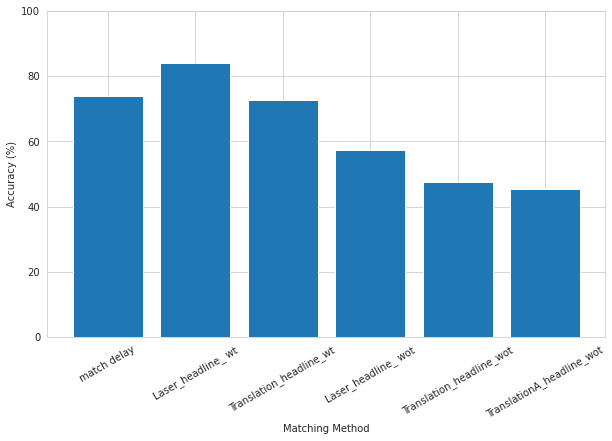

match delay: 73.77% accuracy
Laser_headline_ wt: 84.15% accuracy
Translation_headline_wt: 72.68% accuracy
Laser_headline_ wot: 57.38% accuracy
Translation_headline_wot: 47.54% accuracy
TranslationA_headline_wot: 45.36% accuracy


In [121]:
# Compute matching accuracy for each column
accuracy = {}
for col in columns_to_compare:
    accuracy[col] = (df[col] == df['correct match']).mean() * 100

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(range(len(accuracy)), list(accuracy.values()), align='center')
plt.xticks(range(len(accuracy)), list(accuracy.keys()),rotation=30)
plt.ylim(0, 100)
plt.xlabel('Matching Method')
plt.ylabel('Accuracy (%)')
plt.show()

# Print the accuracy results
for col, acc in accuracy.items():
    print(f'{col}: {acc:.2f}% accuracy')

## Comparison of cosine smilarty score

In [15]:
cols_cos =[ 'Laser_cos_wt','Translation_cos_wt',  'Laser_cos_ wot','Translation_cos_wot', 'TranslationA_cos_wot']
data = df[cols_cos]

Average cosine similarity,standard error

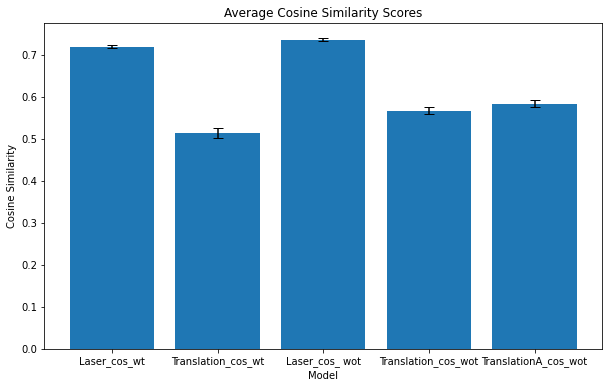

In [21]:
# compute the average and standard error of the mean using the `mean()` and `sem()` methods of the DataFrame
cos_avg = data.mean()
cos_sem = data.sem()
plt.figure(figsize=(10,6))
# create a bar plot of the average cosine similarity scores with error bars
plt.bar(cos_avg.index, cos_avg.values, yerr=cos_sem.values, capsize=5)
plt.title('Average Cosine Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Cosine Similarity')
plt.show()


Covariance

please explain to me the covariance matrix 

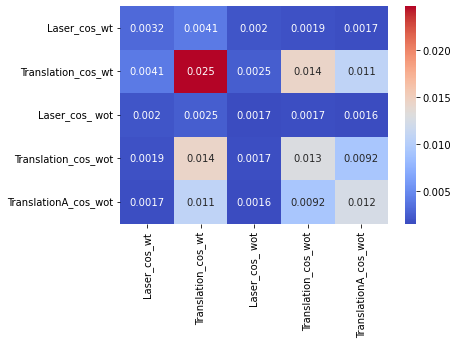

In [99]:
# Compute the covariance matrix between the columns
cov_matrix = data.cov()

# Create heatmap using seaborn
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [ ]:
# group the cosine similarity scores by model and compute the mean
mean_cos = df.groupby('Model').mean()

# plot the mean cosine similarity scores for each model
mean_cos.plot(kind='bar')
plt.title('Mean Cosine Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Mean Cosine Similarity')
plt.show()

Distribution comparison

<Figure size 2160x1080 with 0 Axes>

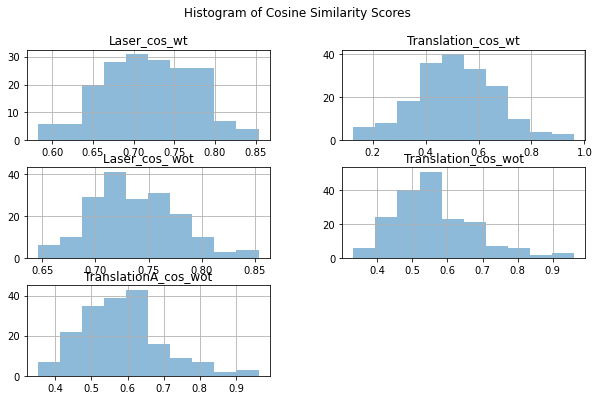

In [96]:
plt.figure(figsize=(30,15))
data.hist(bins=10, figsize=(10,6), alpha=0.5)
plt.suptitle('Histogram of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

#### Box plots

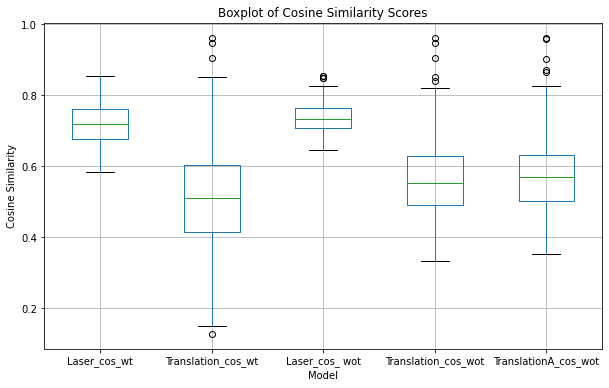

In [85]:
# create a figure with a larger size
plt.figure(figsize=(10,6))

# create the box plot and rotate the title by 45 degrees
data.boxplot()
#plt.xticks(range(len(accuracy)), list(accuracy.keys()), rotation=45, ha='right')
plt.title('Boxplot of Cosine Similarity Scores')
#plt.xticks(rotation=60)
# add x and y axis labels
plt.xlabel('Model')
plt.ylabel('Cosine Similarity')

# show the plot
plt.show()

## Comparaison of deadline 

In [39]:
df=pd.read_excel('/mnt/research-live/user/yzhong/compare.xlsx',engine='openpyxl')
df = df.dropna(subset=['correct match']).loc[df['Only_chinese_version'] != 1.0]

In [47]:
df.reset_index(inplace=True)

In [20]:
df.columns

Index(['Chinese titles', 'reference_translation', 'correct match',
       'Translation/ Model: Helskin', 'Translation/ Model: Small100',
       'Only_chinese_version', 'match delay', 'Laser_headline_ wt',
       'Laser_cos_wt', 'Translation_headline_wt', 'Translation_cos_wt',
       'Laser_headline_ wot', 'Laser_cos_ wot', 'Translation_headline_wot',
       'Translation_cos_wot', 'TranslationA_headline_wot',
       'TranslationA_cos_wot'],
      dtype='object')

In [35]:
df_c=pd.read_parquet('/mnt/research-live/user/yzhong/Chinese_news_data_bloomberg/2023/04/bloomberg_news_Chinese_2023_04_17.parquet')
df_e=pd.read_parquet('/mnt/research-live/user/yzhong/English_news_data_bloomberg/2023/04/bloomberg_news_English_2023_04_17.parquet')

In [28]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Chinese titles', 'reference_translation', 'correct match',
       'Translation/ Model: Helskin', 'Translation/ Model: Small100',
       'Only_chinese_version', 'match delay', 'Laser_headline_ wt',
       'Laser_cos_wt', 'Translation_headline_wt', 'Translation_cos_wt',
       'Laser_headline_ wot', 'Laser_cos_ wot', 'Translation_headline_wot',
       'Translation_cos_wot', 'TranslationA_headline_wot',
       'TranslationA_cos_wot'],
      dtype='object')>

In [36]:
columns_to_compare =['Chinese titles', 'correct match', 'Laser_headline_ wt','Translation_headline_wt', 
            
       'Laser_headline_ wot',  'Translation_headline_wot'
       ]

In [53]:
# create an empty DataFrame to store the new columns
new_df = pd.DataFrame()

# iterate through the list of columns to compare
for col in columns_to_compare:
    # create the name for the delay column
    delay_col = col + ' time'
    # check if the column is Chinese titles
    if col == 'Chinese titles':
        # use the .merge() method to merge the two DataFrames
        merged_df = df.merge(df_c[['headline', 'last_update']], 
                             how='left', 
                             left_on=col, 
                             right_on='headline')
        # add the delay column to the new DataFrame
        new_df[delay_col] = merged_df['last_update']
    else:
        # use the .merge() method to merge the two DataFrames
        merged_df = df.merge(df_e[['headline', 'last_update']], 
                             how='left', 
                             left_on=col, 
                             right_on='headline')
        # add the delay column to the new DataFrame
        new_df[delay_col] = merged_df['last_update']

# concatenate the new DataFrame with the original DataFrame
result_df = pd.concat([df, new_df], axis=1)


In [54]:
result_df.columns

Index(['index', 'Chinese titles', 'reference_translation', 'correct match',
       'Translation/ Model: Helskin', 'Translation/ Model: Small100',
       'Only_chinese_version', 'match delay', 'Laser_headline_ wt',
       'Laser_cos_wt', 'Translation_headline_wt', 'Translation_cos_wt',
       'Laser_headline_ wot', 'Laser_cos_ wot', 'Translation_headline_wot',
       'Translation_cos_wot', 'TranslationA_headline_wot',
       'TranslationA_cos_wot', 'Chinese titles time', 'correct match time',
       'Laser_headline_ wt time', 'Translation_headline_wt time',
       'Laser_headline_ wot time', 'Translation_headline_wot time'],
      dtype='object')

In [55]:
cols_time=['Chinese titles time', 'correct match time',
       'Laser_headline_ wt time', 'Translation_headline_wt time',
       'Laser_headline_ wot time', 'Translation_headline_wot time']

In [62]:
import pandas as pd

# assuming your dataframe is called result_df
# and the column containing the Chinese titles time is called 'Chinese titles time'

cols_time = ['correct match time', 'Laser_headline_ wt time', 'Translation_headline_wt time', 'Laser_headline_ wot time', 'Translation_headline_wot time']

for col in cols_time:
    result_df[col + ' delay'] = (result_df['Chinese titles time'] - result_df[col]).dt.total_seconds() / 60.0


In [78]:
result_df['Chinese titles time']

0     2023-04-17 00:45:27.056
1     2023-04-17 07:53:28.560
2     2023-04-17 10:14:12.548
3     2023-04-17 10:37:45.679
4     2023-04-17 11:34:19.326
                ...          
178   2023-04-17 12:08:12.726
179   2023-04-17 13:11:59.494
180   2023-04-17 15:42:16.188
181   2023-04-17 19:40:58.187
182   2023-04-17 23:18:06.339
Name: Chinese titles time, Length: 183, dtype: datetime64[ns]

In [77]:
result_df.loc[:1]

,index,Chinese titles,reference_translation,correct match,Translation/ Model: Helskin,Translation/ Model: Small100,Only_chinese_version,match delay,Laser_headline_ wt,Laser_cos_wt,...,correct match time,Laser_headline_ wt time,Translation_headline_wt time,Laser_headline_ wot time,Translation_headline_wot time,correct match time delay,Laser_headline_ wt time delay,Translation_headline_wt time delay,Laser_headline_ wot time delay,Translation_headline_wot time delay
0,0,*宇通客车在上海暂停交易,Yutong Bus suspends trading in Shanghai.,*YUTONG BUS SUSPENDS TRADING IN SHANGHAI,The Woo-tung bus is suspended in Shanghai.,Airbus suspended transactions in Shanghai,0.0,*YUTONG BUS SUSPENDS TRADING IN SHANGHAI,*YUTONG BUS SUSPENDS TRADING IN SHANGHAI,0.819163,...,2023-04-17 00:45:27.015,2023-04-17 00:45:27.015,2023-04-17 00:45:27.015,2023-04-17 00:45:27.015,2023-04-17 00:45:27.015,0.000683,0.000683,0.000683,0.000683,0.000683
1,2,日经:日本大型银行考虑使用AI聊天机器人 帮助处理报告等内部任务,Nikkei: Major Japanese banks are considering u...,"Japan’s Megabanks Weigh Use of AI Chatbots, Ni...",Japanese Menstruation: Large Japanese banks ar...,Japanese big banks consider using AI chat robo...,0.0,Teck’s Keevil Says He’s Open to Deals After Pl...,Rovio Jumps as Sega Offers to Buy Angry Birds ...,0.660154,...,2023-04-17 03:44:45.251,2023-04-17 07:52:07.362,2023-04-17 07:56:52.429,2023-04-17 03:44:45.251,2023-04-17 03:44:45.251,248.721817,1.353300,-3.397817,248.721817,248.721817


In [65]:
result_df.columns

Index(['index', 'Chinese titles', 'reference_translation', 'correct match',
       'Translation/ Model: Helskin', 'Translation/ Model: Small100',
       'Only_chinese_version', 'match delay', 'Laser_headline_ wt',
       'Laser_cos_wt', 'Translation_headline_wt', 'Translation_cos_wt',
       'Laser_headline_ wot', 'Laser_cos_ wot', 'Translation_headline_wot',
       'Translation_cos_wot', 'TranslationA_headline_wot',
       'TranslationA_cos_wot', 'Chinese titles time', 'correct match time',
       'Laser_headline_ wt time', 'Translation_headline_wt time',
       'Laser_headline_ wot time', 'Translation_headline_wot time',
       'correct match time delay', 'Laser_headline_ wt time delay',
       'Translation_headline_wt time delay', 'Laser_headline_ wot time delay',
       'Translation_headline_wot time delay'],
      dtype='object')

<Figure size 576x432 with 0 Axes>

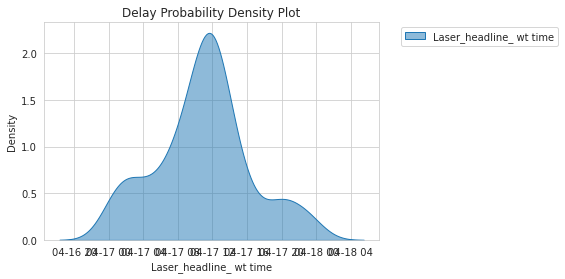

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
# create a larger figure for the plot
fig = plt.figure(figsize=(8, 6))
# create a subplot for the plot
fig, ax = plt.subplots()
col='Laser_headline_ wt time'
sns.kdeplot(result_df[col], ax=ax, label=col, fill=True, alpha=0.5)

ax.set_title('Delay Probability Density Plot')
ax.legend()
# move the legend outside the plot and adjust its position
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# show the plot
plt.show()


In [80]:
result_df[result_df['correct match time delay']>90]

,index,Chinese titles,reference_translation,correct match,Translation/ Model: Helskin,Translation/ Model: Small100,Only_chinese_version,match delay,Laser_headline_ wt,Laser_cos_wt,...,correct match time,Laser_headline_ wt time,Translation_headline_wt time,Laser_headline_ wot time,Translation_headline_wot time,correct match time delay,Laser_headline_ wt time delay,Translation_headline_wt time delay,Laser_headline_ wot time delay,Translation_headline_wot time delay
1,2,日经:日本大型银行考虑使用AI聊天机器人 帮助处理报告等内部任务,Nikkei: Major Japanese banks are considering u...,"Japan’s Megabanks Weigh Use of AI Chatbots, Ni...",Japanese Menstruation: Large Japanese banks ar...,Japanese big banks consider using AI chat robo...,0.0,Teck’s Keevil Says He’s Open to Deals After Pl...,Rovio Jumps as Sega Offers to Buy Angry Birds ...,0.660154,...,2023-04-17 03:44:45.251,2023-04-17 07:52:07.362,2023-04-17 07:56:52.429,2023-04-17 03:44:45.251,2023-04-17 03:44:45.251,248.721817,1.353300,-3.397817,248.721817,248.721817
25,32,谷歌CEO提醒不要仓促推出AI技术 需要合理监管,Google CEO warns against rushing to deploy AI ...,Google CEO Warns Against Rush to Deploy AI Wit...,Google CEO cautioned against hasty introductio...,Google CEO warns not to hurry launching AI tec...,0.0,ESG DAILY: Investors Get Some Answers From EU ...,ESG DAILY: Investors Get Some Answers From EU ...,0.582635,...,2023-04-17 03:15:02.861,2023-04-17 05:19:14.920,2023-04-17 05:19:14.920,2023-04-17 03:15:02.861,2023-04-17 03:15:02.861,187.927717,63.726733,63.726733,187.927717,187.927717
70,87,中国平安据悉或在汇丰股东年会上支持维权股东提出的决议案,China Ping An is said to support a resolution ...,Ping An Likely to Support Hong Kong Shareholde...,China was informed of and supported the resolu...,China’s Peace Security has or supported a reso...,0.0,"AstraZeneca, Shell, HSBC, Unilever: U.K. Equit...",Ping An Likely to Back HSBC AGM Activist on Pa...,0.651624,...,2023-04-17 11:44:35.422,2023-04-17 14:20:57.527,2023-04-17 14:20:57.527,2023-04-17 11:44:35.422,2023-04-17 11:44:35.422,204.279483,47.911067,47.911067,204.279483,204.279483
78,95,第一信托银行难觅买主 问题出在那群富人客户身上,The First Trust Bank is struggling to find a b...,First Republic’s Loans to Rich Clients Present...,The difficulty of finding buyers in the first ...,The first trust bank is hard to find the buyer...,0.0,US IG ISSUANCE: Wells Fargo Leads Four Firms S...,BlackRock to Kick off Sales of Failed Banks’ S...,0.623129,...,2023-04-17 13:21:20.682,2023-04-17 18:23:20.686,2023-04-17 18:23:20.686,2023-04-17 13:21:20.682,2023-04-17 13:21:20.682,337.296500,35.296433,35.296433,337.296500,337.296500
122,146,荷兰:俄罗斯和中国是国家安全最大威胁 中国常隐瞒政府或军方的参与,Netherlands: Russia and China pose the greates...,"Dutch Say Russia, China Are Biggest Threats to...",Netherlands: Russia and China are the greatest...,Netherlands: Russia and China are the biggest ...,0.0,Europe’s Blue-Chip Index Inches Toward Highest...,"Dutch Say Russia, China Are Biggest Threats to...",0.733444,...,2023-04-17 12:35:16.169,2023-04-17 12:35:16.169,2023-04-17 12:35:16.169,2023-04-17 12:35:16.169,2023-04-17 12:35:16.169,195.843717,195.843717,195.843717,195.843717,195.843717
123,147,皖通高速拟定增A股并以至多40亿人民币购买资产 申请在上海复牌,Anhui Expressway plans to issue additional A-s...,Anhui Expressway to Buy Assets for Up To $4B Y...,It is proposed to increase the A share at high...,Shenzhen plans to increase A shares and buy as...,0.0,Anhui Expressway to Buy Assets for Up To $4B Y...,Anhui Expressway to Buy Assets for Up To $4B Y...,0.718050,...,2023-04-17 14:41:43.625,2023-04-17 14:41:43.625,2023-04-17 14:41:43.625,2023-04-17 14:41:43.625,2023-04-17 14:41:43.625,95.369383,95.369383,95.369383,95.369383,95.369383
124,148,原油:油价下跌 需求疲软迹象和强势美元令交易员谨慎,Crude oil: Oil prices fall due to signs of wea...,ASIA OIL PRODUCTS: Diesel Flashes Recession Si...,Crude oil: The signs of weak demand for lower ...,Raw oil: Signs of weak demand and strong dolla...,0.0,"ESG DAILY: GM, Tesla and Ford EVs Are Set for ...",AMERICAS CRUDE: US Warns on Possible Price Cap...,0.671950,...,2023-04-17 15:13:54.

<Figure size 576x432 with 0 Axes>

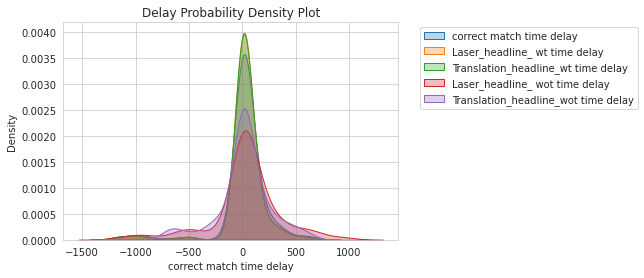

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# assuming your dataframe is called result_df and the delay columns are already calculated

delay_cols = ['correct match time delay', 'Laser_headline_ wt time delay', 'Translation_headline_wt time delay', 'Laser_headline_ wot time delay', 'Translation_headline_wot time delay']

# set seaborn style
sns.set_style('whitegrid')
# create a larger figure for the plot
fig = plt.figure(figsize=(8, 6))
# create a subplot for the plot
fig, ax = plt.subplots()

# loop over the delay columns and plot each one
for col in delay_cols:
    sns.kdeplot(result_df[col], ax=ax, label=col, fill=True, alpha=0.3)

# set the y-axis limits and ticks
#ax.set_ylim([0, 0.14])
#ax.set_yticks([i/10 for i in range(0, 15, 2)])

# add a title and legend to the plot
ax.set_title('Delay Probability Density Plot')
ax.legend()
# move the legend outside the plot and adjust its position
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# show the plot
plt.show()


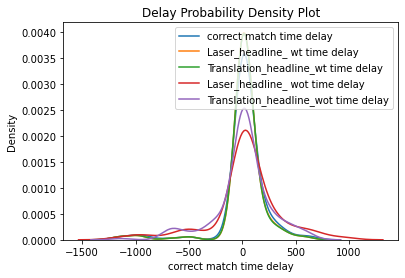

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# assuming your dataframe is called result_df and the delay columns are already calculated

delay_cols = ['correct match time delay', 'Laser_headline_ wt time delay', 'Translation_headline_wt time delay', 'Laser_headline_ wot time delay', 'Translation_headline_wot time delay']

# create a subplot for the plot
fig, ax = plt.subplots()

# loop over the delay columns and plot each one
for col in delay_cols:
    sns.kdeplot(result_df[col], ax=ax, label=col)

# add a title and legend to the plot
ax.set_title('Delay Probability Density Plot')
ax.legend()

# show the plot
plt.show()


In [58]:
result_df['correct match time'][1]

Timestamp('2023-04-17 03:44:45.251000')

In [ ]:
chinese_headline=

In [ ]:
cols_cos =[ 'Laser_cos_wt','Translation_cos_wt',  'Laser_cos_ wot','Translation_cos_wot', 'TranslationA_cos_wot']
data = df[cols_cos]

## Comparaison of translation

In [3]:
import nltk
from nltk.translate.meteor_score import meteor_score

In [4]:
df=pd.read_excel('/mnt/research-live/user/yzhong/compare.xlsx',engine='openpyxl')

In [24]:
df.columns

Index(['Chinese titles', 'reference_translation', 'correct match',
       'Translation/ Model: Helskin', 'Translation/ Model: Small100',
       'Only_chinese_version', 'match delay', 'Laser_headline_ wt',
       'Laser_cos_wt', 'Translation_headline_wt', 'Translation_cos_wt',
       'Laser_headline_ wot', 'Laser_cos_ wot', 'Translation_headline_wot',
       'Translation_cos_wot', 'TranslationA_headline_wot',
       'TranslationA_cos_wot'],
      dtype='object')

In [8]:
type(reference[0])

str

In [14]:
import re
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

# Define a custom tokenization function using regular expressions
def tokenize(text):
    # Split the text into words using a regular expression
    words = re.findall(r'\b\w+\b', text)
    # Convert the words to lowercase
    words = [w.lower() for w in words]
    # Return the list of words
    return words

# Load the reference translations
reference = df['reference_translation'].tolist()

# Load the translations from each model
translations1 = df['Translation/ Model: Helskin'].tolist()
translations2 = df['Translation/ Model: Small100'].tolist()

# Tokenize the reference translations and the translations from each model using the custom tokenization function
ref_tokenized = [tokenize(str(sent)) for sent in reference]
translation_tokenized1 = [tokenize(str(sent)) for sent in translations1]
translation_tokenized2 = [tokenize(str(sent)) for sent in translations2]


# Define the smoothing function
smoothie = SmoothingFunction().method4

# Calculate the BLEU score for each model using the smoothing function
bleu_score1 = corpus_bleu(ref_tokenized, translation_tokenized1, smoothing_function=smoothie)
bleu_score2 = corpus_bleu(ref_tokenized, translation_tokenized2, smoothing_function=smoothie)

# Print the BLEU score for each model
print("BLEU score for Model 1:", bleu_score1)
print("BLEU score for Model 2:", bleu_score2)


BLEU score for Model 1: 0.034619015826318995
BLEU score for Model 2: 0.053358239226194516


In [ ]:
import nltk
from nltk.translate.meteor_score import meteor_score


# Get the translations from each data frame
translations1 = df1['Translation/Model: Helsinki'].tolist()
translations2 = df2['Translation/Model: Small100'].tolist()

# Calculate the METEOR score for each set of translations
meteor_score1 = meteor_score(translations1, reference)
meteor_score2 = meteor_score(translations2, reference)

# Print the METEOR score for each set of translations
print("METEOR score for Model 1:", meteor_score1)
print("METEOR score for Model 2:", meteor_score2)
